# **Import Required libraries**

In [1]:
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [23]:
tfidf_Vect = TfidfVectorizer()
X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)

# Create a MultinomialNB Classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, twenty_train.target)

twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

predicted = clf.predict(X_test_tfidf)
score = metrics.accuracy_score(twenty_test.target, predicted)
print("Accuracy of multinomial naive bayes model is",score)

Accuracy of multinomial naive bayes model is 0.7738980350504514


# **1. Apply SVM and check Accuracy**

1. Import required svm model
2. Create a svm Classifier
3. Fit the model
4. Predict the test data
5. Check accuracy using accuracy_score()

In [8]:
# Import svm model
from sklearn.svm import LinearSVC


# Create a svm Classifier
clf_svm = LinearSVC()

# Fit the model
clf_svm.fit(X_train_tfidf, twenty_train.target)

# Predict the test data
y_pred_svm = clf_svm.predict(X_test_tfidf)

# Model Accuracy
score_svm = metrics.accuracy_score(twenty_test.target, y_pred_svm)
print("SVM Accuracy: ", score_svm)

SVM Accuracy:  0.8531598513011153


# **2. Classification_report for SVM**

In [9]:
from sklearn.metrics import classification_report

print(classification_report(twenty_test.target, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       319
           1       0.76      0.80      0.78       389
           2       0.77      0.73      0.75       394
           3       0.71      0.76      0.74       392
           4       0.84      0.86      0.85       385
           5       0.87      0.76      0.81       395
           6       0.83      0.91      0.87       390
           7       0.92      0.91      0.91       396
           8       0.95      0.95      0.95       398
           9       0.92      0.95      0.93       397
          10       0.96      0.98      0.97       399
          11       0.93      0.94      0.93       396
          12       0.81      0.79      0.80       393
          13       0.90      0.87      0.88       396
          14       0.90      0.93      0.92       394
          15       0.84      0.93      0.88       398
          16       0.75      0.92      0.82       364
          17       0.97    

# **3.Apply KNeighborsClassifier and check accuracy**

In [10]:
# Import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
clf_knn.fit(X_train_tfidf, twenty_train.target)

# Predict the response for test dataset
y_pred_knn = clf_knn.predict(X_test_tfidf)

# Model Accuracy
score_knn = metrics.accuracy_score(twenty_test.target, y_pred_knn)
print("KNeighborsClassifier Accuracy: ", score_knn)

KNeighborsClassifier Accuracy:  0.6578597981943707


# **4. classification_report for KNeighborsClassifier**

In [11]:
print(classification_report(twenty_test.target, y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.75      0.54       319
           1       0.45      0.65      0.53       389
           2       0.52      0.56      0.54       394
           3       0.52      0.62      0.57       392
           4       0.55      0.58      0.56       385
           5       0.69      0.59      0.64       395
           6       0.59      0.48      0.53       390
           7       0.75      0.68      0.71       396
           8       0.83      0.80      0.82       398
           9       0.77      0.75      0.76       397
          10       0.88      0.82      0.85       399
          11       0.74      0.83      0.78       396
          12       0.72      0.47      0.57       393
          13       0.78      0.51      0.62       396
          14       0.81      0.77      0.79       394
          15       0.80      0.72      0.76       398
          16       0.72      0.72      0.72       364
          17       0.70    

# **5.Set the tfidf vectorizer parameter to use bigram and check accuracy**

In [17]:
# Setting the vectorizer parameter to use bigram 
tfidf_Vect = TfidfVectorizer(ngram_range=(1, 2))

X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)

# Create a svm Classifier
clf_svm = LinearSVC()

# Train the model using the training sets
clf_svm.fit(X_train_tfidf, twenty_train.target)

X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

# Predict the response for test dataset
y_pred_svm_bigram = clf_svm.predict(X_test_tfidf)

# Model Accuracy
score_svm_bigram = metrics.accuracy_score(twenty_test.target, y_pred_svm_bigram)
print("SVM Accuracy after using bigram: ", score_svm_bigram)

SVM Accuracy after using bigram:  0.8574083908656399


# **6. Set tfidf vectorizer argument to use stop_words='english' and check accuracy**

In [20]:
tfidf_Vect = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)

# Create a svm Classifier
clf_svm = LinearSVC()

# Fit the model using train data
clf_svm.fit(X_train_tfidf, twenty_train.target)


X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

# Predict the test data
y_pred_svm_stopwords = clf_svm.predict(X_test_tfidf)

# Model Accuracy
score_svm_stopwords = metrics.accuracy_score(twenty_test.target, y_pred_svm_stopwords)
print("SVM Accuracy with tfidf vectorizer argument as stopwards: ", score_svm_stopwords)

SVM Accuracy with tfidf vectorizer argument as stopwards:  0.851035581518853


## Accuracy Observation:

1. I have tested accuracy on SVM model initially got accuracy of 85.31%
2. After setting tfidf parameter to bigram tested accuracy of SVM model again and got accuracy as 85.74%. Accuracy increased slightly.
3. Third time did setting in tfidf parameters by passing stopword = 'english'
and tested SVM model and got accuracy of 85.10%. Accuracy decreased slightly. 

In [21]:
print("SVM Accuracy: ", score_svm)
print("SVM Accuracy with tfidf vectorizer parameter of bigram: ", score_svm_bigram)
print("SVM Accuracy with tfidf vectorizer argument as stopwards: ", score_svm_stopwords)

SVM Accuracy:  0.8531598513011153
SVM Accuracy with tfidf vectorizer parameter of bigram:  0.8574083908656399
SVM Accuracy with tfidf vectorizer argument as stopwards:  0.851035581518853


# 7. Accuracy plot for all model

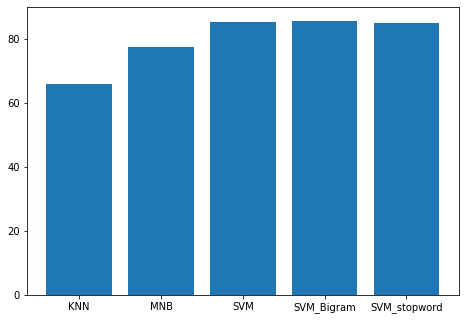

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['KNN', 'MNB', 'SVM', 'SVM_Bigram', 'SVM_stopword']
students = [65.78,77.38,85.31,85.74,85.10]
ax.bar(langs,students)
plt.show()